In [173]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn.neighbors import KernelDensity

In [3]:
np.random.seed(1)
N = 20
X = np.concatenate(
    (np.random.normal(0, 1, int(0.3 * N)), np.random.normal(5, 1, int(0.7 * N)))
)[:, np.newaxis]
X_plot = np.linspace(-5, 10, 1000)[:, np.newaxis]
bins = np.linspace(-5, 10, 10)

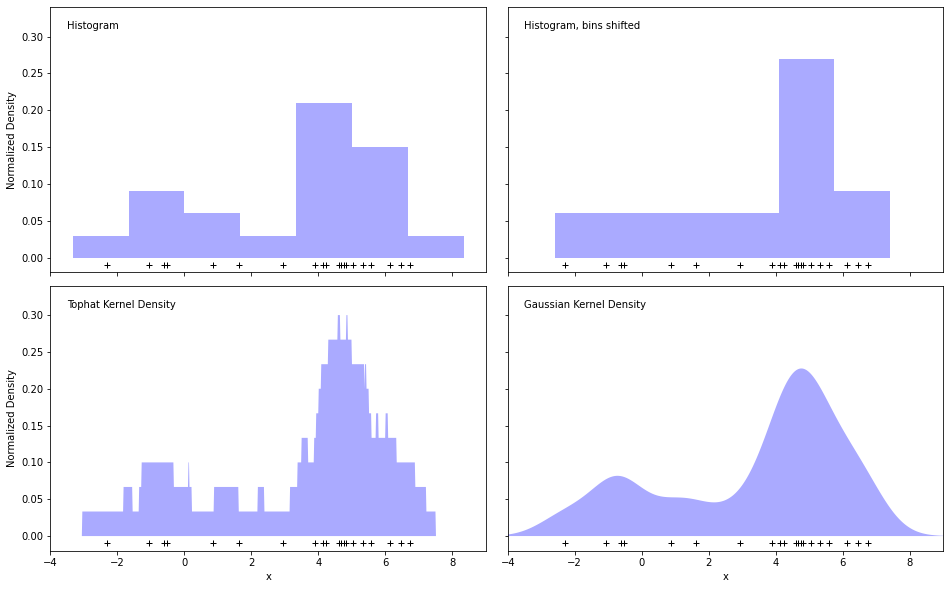

In [5]:
fig, ax = plt.subplots(2, 2, figsize=(16,10), sharex=True, sharey=True)
fig.subplots_adjust(hspace=0.05, wspace=0.05)

# histogram 1
ax[0, 0].hist(X[:, 0], bins=bins, fc="#AAAAFF", density=True)
ax[0, 0].text(-3.5, 0.31, "Histogram")

# histogram 2
ax[0, 1].hist(X[:, 0], bins=bins + 0.75, fc="#AAAAFF", density=True)
ax[0, 1].text(-3.5, 0.31, "Histogram, bins shifted")

# tophat KDE
kde = KernelDensity(kernel="tophat", bandwidth=0.75).fit(X)
log_dens = kde.score_samples(X_plot)
ax[1, 0].fill(X_plot[:, 0], np.exp(log_dens), fc="#AAAAFF")
ax[1, 0].text(-3.5, 0.31, "Tophat Kernel Density")

# Gaussian KDE
kde = KernelDensity(kernel="gaussian", bandwidth=0.75).fit(X)
log_dens = kde.score_samples(X_plot)
ax[1, 1].fill(X_plot[:, 0], np.exp(log_dens), fc="#AAAAFF")
ax[1, 1].text(-3.5, 0.31, "Gaussian Kernel Density")

for axi in ax.ravel():
    axi.plot(X[:, 0], np.full(X.shape[0], -0.01), "+k")
    axi.set_xlim(-4, 9)
    axi.set_ylim(-0.02, 0.34)

for axi in ax[:, 0]:
    axi.set_ylabel("Normalized Density")

for axi in ax[1, :]:
    axi.set_xlabel("x")

Text(0.5, 1.0, 'Available Kernels')

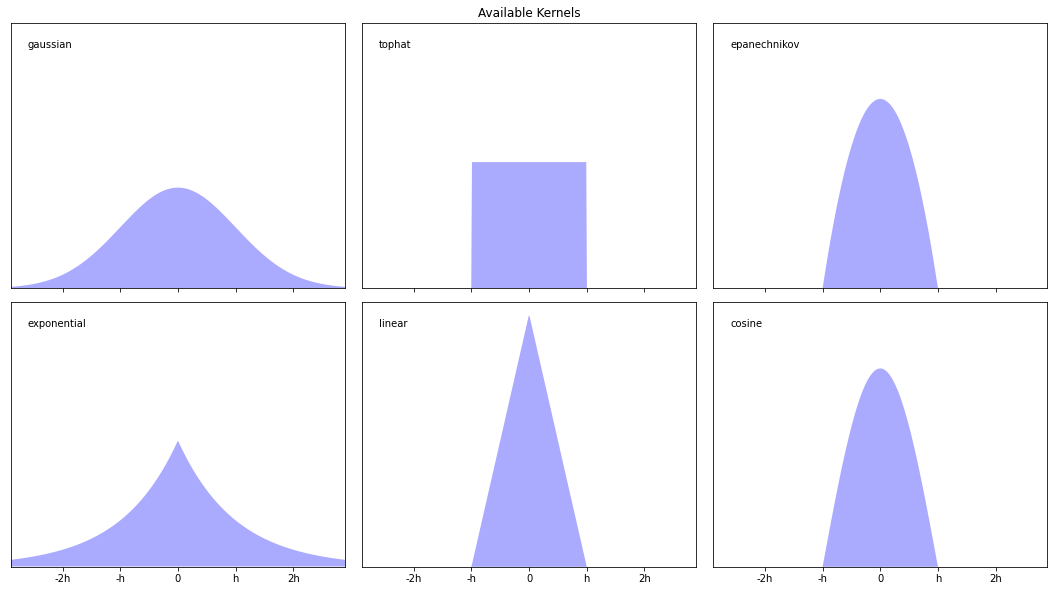

In [7]:
X_plot = np.linspace(-6, 6, 1000)[:, None]
X_src = np.zeros((1, 1))

fig, ax = plt.subplots(2, 3, figsize=(16,10), sharex=True, sharey=True)
fig.subplots_adjust(left=0.05, right=0.95, hspace=0.05, wspace=0.05)


def format_func(x, loc):
    if x == 0:
        return "0"
    elif x == 1:
        return "h"
    elif x == -1:
        return "-h"
    else:
        return "%ih" % x


for i, kernel in enumerate(
    ["gaussian", "tophat", "epanechnikov", "exponential", "linear", "cosine"]
):
    axi = ax.ravel()[i]
    log_dens = KernelDensity(kernel=kernel).fit(X_src).score_samples(X_plot)
    axi.fill(X_plot[:, 0], np.exp(log_dens), "-k", fc="#AAAAFF")
    axi.text(-2.6, 0.95, kernel)

    axi.xaxis.set_major_formatter(plt.FuncFormatter(format_func))
    axi.xaxis.set_major_locator(plt.MultipleLocator(1))
    axi.yaxis.set_major_locator(plt.NullLocator())

    axi.set_ylim(0, 1.05)
    axi.set_xlim(-2.9, 2.9)

ax[0, 1].set_title("Available Kernels")


(-0.02, 0.4)

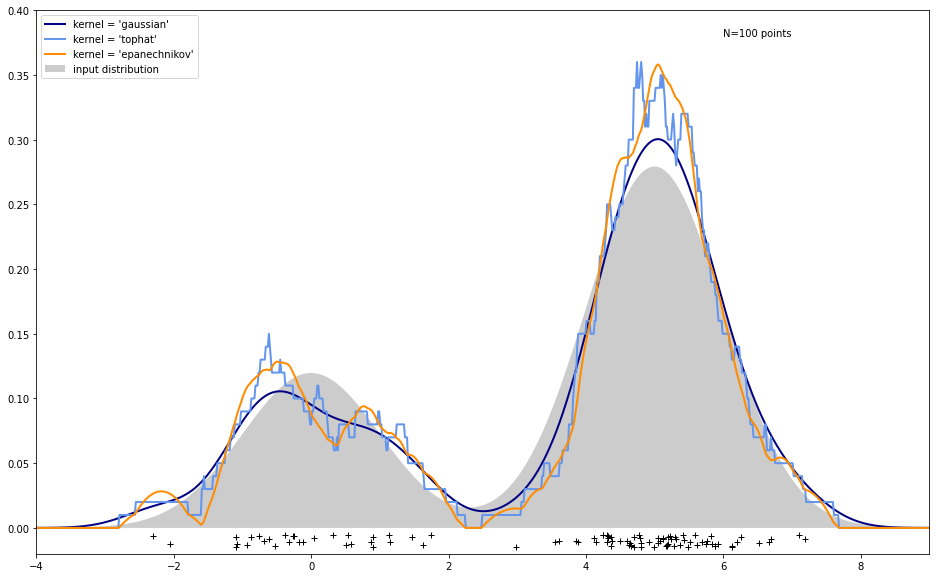

In [8]:
N = 100
np.random.seed(1)
X = np.concatenate(
    (np.random.normal(0, 1, int(0.3 * N)), np.random.normal(5, 1, int(0.7 * N)))
)[:, np.newaxis]

X_plot = np.linspace(-5, 10, 1000)[:, np.newaxis]

true_dens = 0.3 * norm(0, 1).pdf(X_plot[:, 0]) + 0.7 * norm(5, 1).pdf(X_plot[:, 0])

fig, ax = plt.subplots(figsize=(16,10))
ax.fill(X_plot[:, 0], true_dens, fc="black", alpha=0.2, label="input distribution")
colors = ["navy", "cornflowerblue", "darkorange"]
kernels = ["gaussian", "tophat", "epanechnikov"]
lw = 2

for color, kernel in zip(colors, kernels):
    kde = KernelDensity(kernel=kernel, bandwidth=0.5).fit(X)
    log_dens = kde.score_samples(X_plot)
    ax.plot(
        X_plot[:, 0],
        np.exp(log_dens),
        color=color,
        lw=lw,
        linestyle="-",
        label="kernel = '{0}'".format(kernel),
    )

ax.text(6, 0.38, "N={0} points".format(N))

ax.legend(loc="upper left")
ax.plot(X[:, 0], -0.005 - 0.01 * np.random.random(X.shape[0]), "+k")

ax.set_xlim(-4, 9)
ax.set_ylim(-0.02, 0.4)

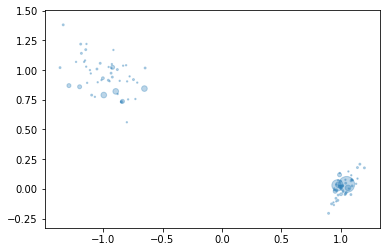

In [183]:
rng = np.random.default_rng(10)

mean = [-1, 1]
cov = 0.01*np.array([[6, -3], [-3, 3.5]])
x1, y1 = rng.multivariate_normal(mean, cov, 50).T

mean = [1, 0]
cov = 0.001*np.array([[3.5, 3], [3, 6]])
x2, y2 = rng.multivariate_normal(mean, cov, 50).T

x = np.hstack((x1,x2))
y = np.hstack((y1,y2))

w = 2**(rng.geometric(p=0.5, size=len(x))-1)

plt.scatter(x, y, marker='o', s=w*2, alpha=0.3)
plt.axis('equal');

In [194]:
kde = KernelDensity(kernel='gaussian', bandwidth=0.05, metric='chebyshev').fit(np.column_stack((x,y)), sample_weight=w)
log_dens = kde.score_samples(XY)
Z = np.exp(log_dens)
Z = (Z/np.sum(area*Z)).reshape(X.shape)
print(np.max(Z))

22.811608883738305


In [158]:
XY = np.column_stack((np.ravel(X), np.ravel(Y)))

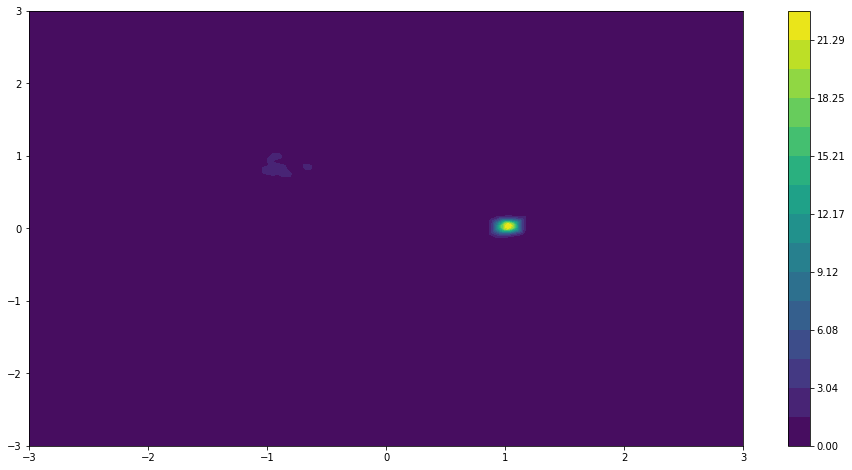

In [195]:
# make data
#X, Y = np.meshgrid(np.linspace(-3, 3, 256), np.linspace(-3, 3, 256))
#Z = (1 - X/2 + X**5 + Y**3) * np.exp(-X**2 - Y**2)
levels = np.linspace(Z.min(), Z.max(), 16)

# plot
fig, ax = plt.subplots(figsize=(16,8))

cs = ax.contourf(X, Y, Z, levels=levels);
cbar = fig.colorbar(cs);

In [196]:
area = (X[-1,-1]-X[-1,-2])**2
print(X[-1,-1]-X[-1,-2], area)

0.0235294117647058 0.0005536332179930756


In [197]:
np.sum(area*Z)

1.0

In [192]:
pd.Series(np.ravel(Z)).describe()

count     6.553600e+04
mean      3.510933e-02
std       5.987341e-01
min       0.000000e+00
25%      3.817149e-304
50%      3.157471e-157
75%       1.525319e-58
max       2.905899e+01
dtype: float64